# GRIP- The Sparks Foundation.
 
 Data Science and Business Analytics Internship.
  
 TASK 2 : Predicting using unsupervised ML
 





In this task from thr given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

By: Vaishnavi Agrawal

IMPORTING THE NECESSARY LIBRARIES:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

Loading the iris dataset

In [2]:
url = "C:\\\\Users\\\\mitta\\\\Downloads\\\\Iris.csv"
iris_data = pd.read_csv(url)

In [3]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Exploring the Dataset

In [4]:
# representing the dimensionality of the Dataframe:
iris_data.shape

(150, 6)

In [5]:
# checking for null values:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


DATA VISUALIZATION FOR SPECIES USING BOX PLOT GRAGH AND PAIRPLOT

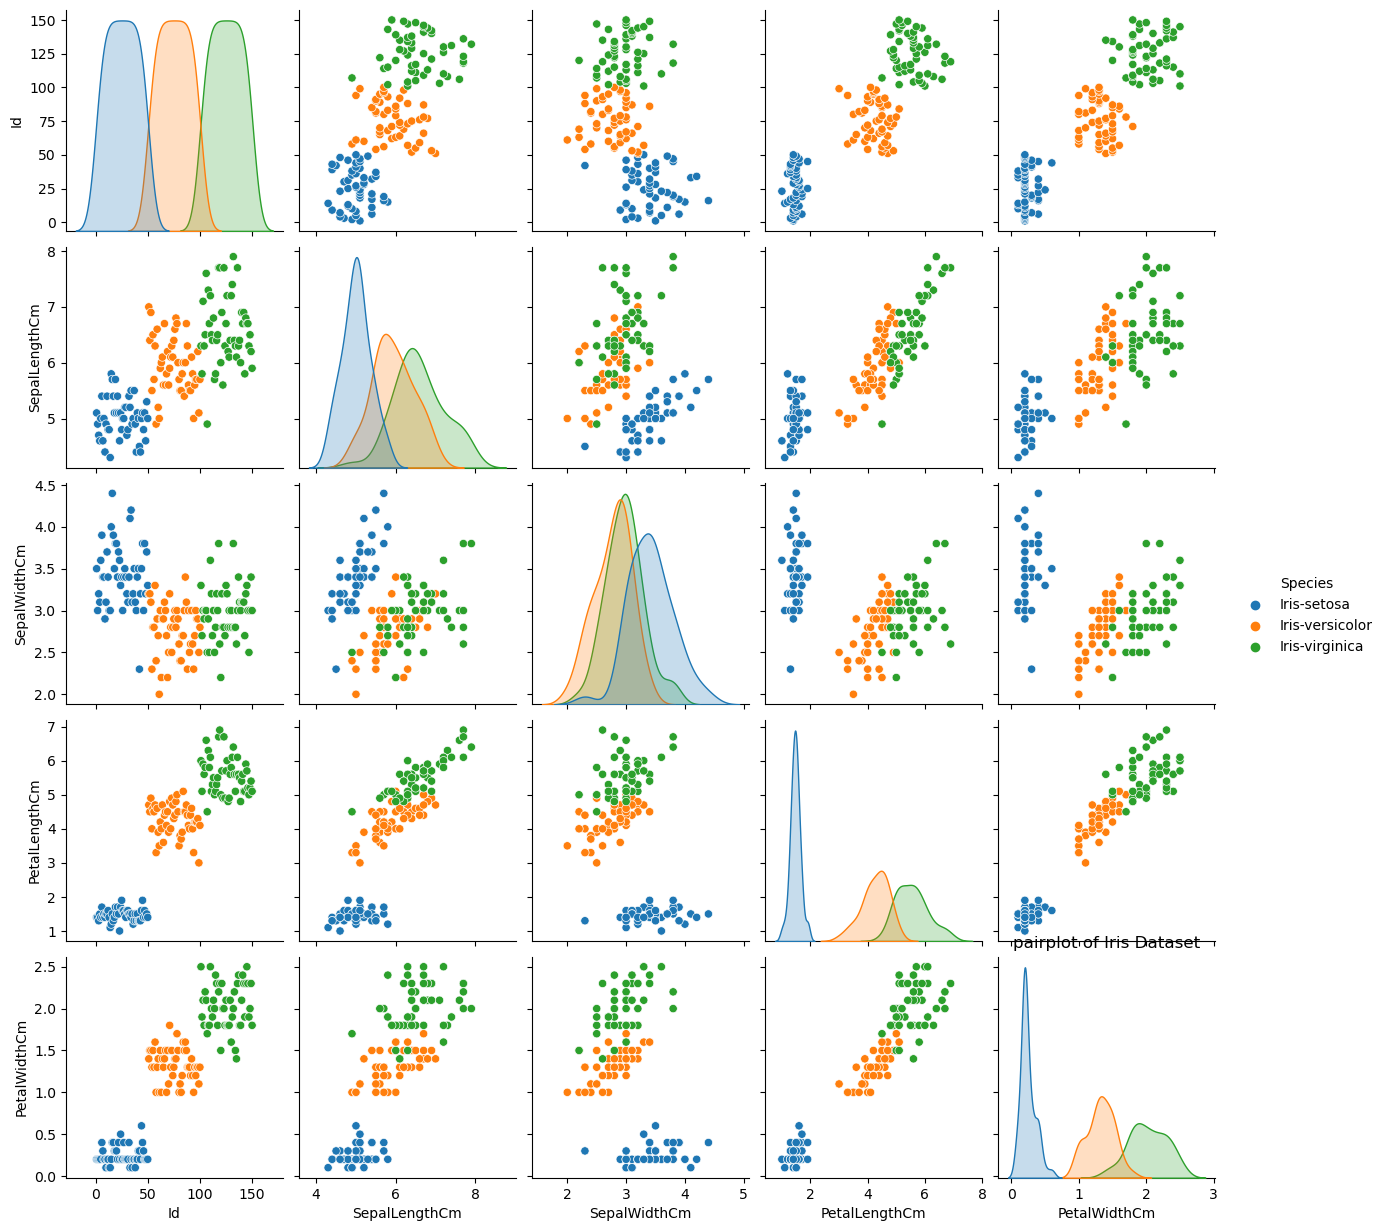

In [10]:
# Pairplot to visualize relationship between variables
sns.pairplot(iris_data, hue = 'Species')
plt.title('pairplot of Iris Dataset')
plt.show()

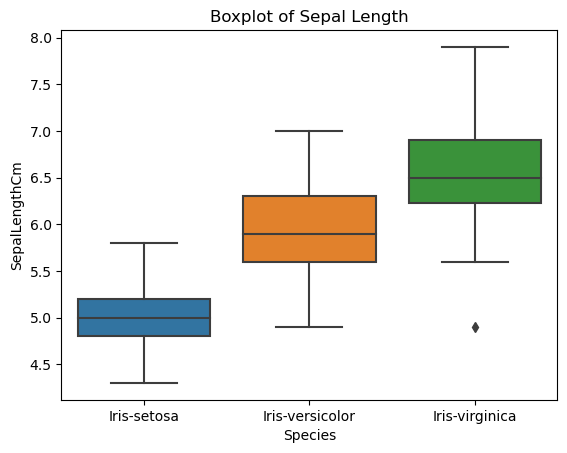

In [11]:
# Boxplot to visualize the distribution of features
sns.boxplot(x='Species', y='SepalLengthCm', data=iris_data)
plt.title('Boxplot of Sepal Length')
plt.show()

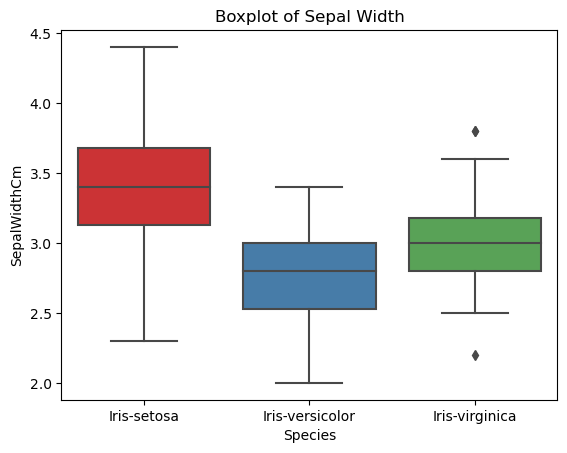

In [12]:
# Box plot to visualize the distribution of the features
sns.boxplot(x='Species', y='SepalWidthCm',data=iris_data,palette='Set1')
plt.title('Boxplot of Sepal Width')
plt.show()

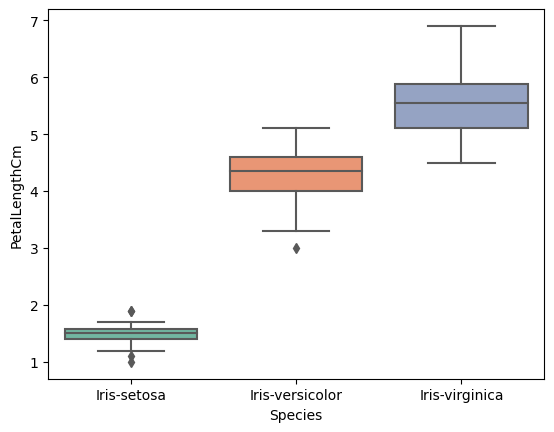

In [13]:
#Boxplot to visualiize the distribution of features
sns.boxplot(x='Species',y='PetalLengthCm',data=iris_data,palette='Set2')
plt.show()

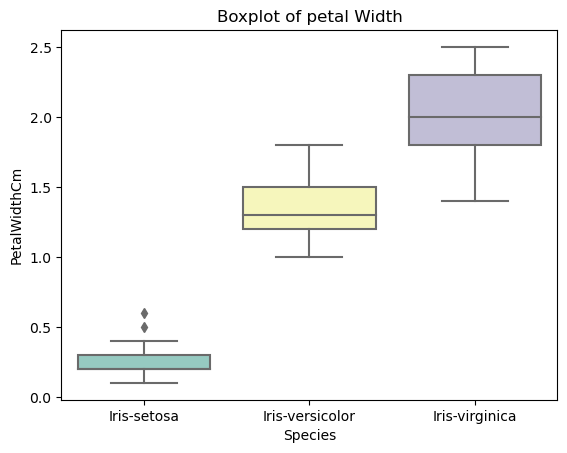

In [14]:
# boxplot to visualize the distribution of the features
sns.boxplot(x='Species',y='PetalWidthCm',data=iris_data,palette='Set3')
plt.title('Boxplot of petal Width')
plt.show()

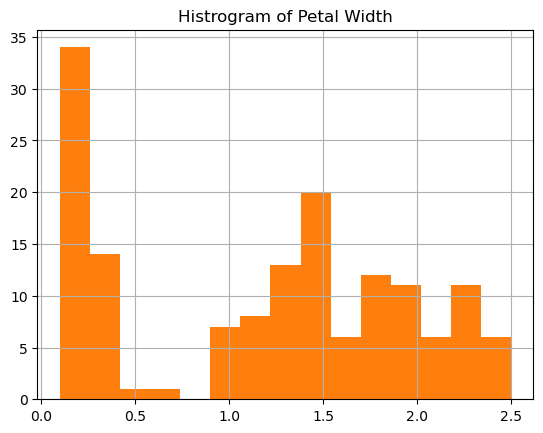

In [38]:
#Histrogram to visualization the distribution of features
plt.hist(iris_data['PetalWidthCm'],bins=15)
plt.title('Histrogram of Petal Width')
plt.grid(True) #add grid
plt.show()

In [21]:
#calculate correlation matrix 
correlation_matrix = iris_data.corr()

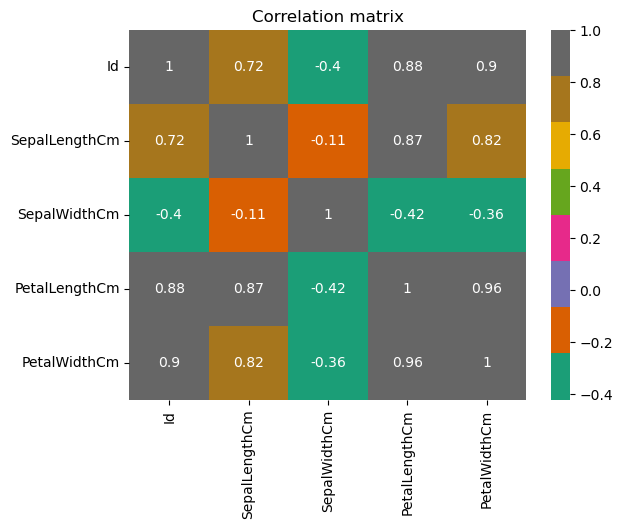

In [22]:
#plot correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Dark2')
plt.title('Correlation matrix')
plt.show()

FIND THE NUMBER OF CLUSTERS USING K-MEANS CLUSTERS

In [23]:
# Select the features for clustring
x =iris_data.iloc[:,:-1].values

In [24]:
#determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('Kmeans:',i,"wcss",kmeans.inertia_)

Kmeans: 1 wcss 281918.3243999999
Kmeans: 2 wcss 70616.29893333331
Kmeans: 3 wcss 31326.8868
Kmeans: 4 wcss 17798.008728070174
Kmeans: 5 wcss 11440.794903225806
Kmeans: 6 wcss 7913.140425641027
Kmeans: 7 wcss 5905.830285337852
Kmeans: 8 wcss 4573.222868421052
Kmeans: 9 wcss 3587.2209044117644
Kmeans: 10 wcss 2971.336674612153


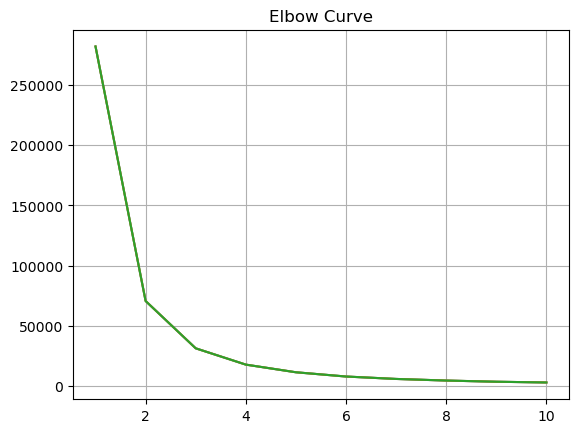

In [27]:
# plot the elbow curve
plt.plot(range(1,11), wcss)
plt.title('Elbow Curve')
plt.grid(True) #add grid
plt.show()

from the above plot A clear elbow is seen to be formed at 3 Thus, the optimum number of clusting is 3.

# training the model 

In [30]:
# applying k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters= 3,init = 'k-means++', max_iter = 300,n_init=10)
y_kmeans = kmeans.fit_predict(x)

In [31]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# cluster visualization

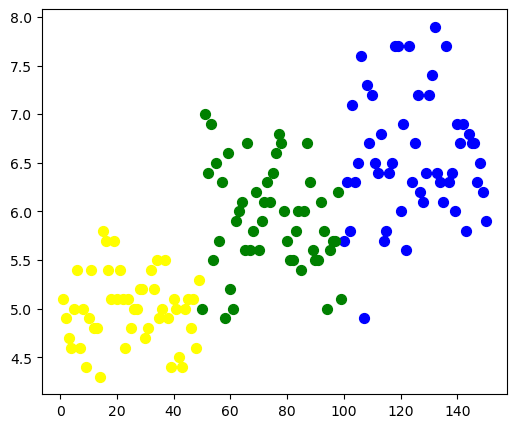

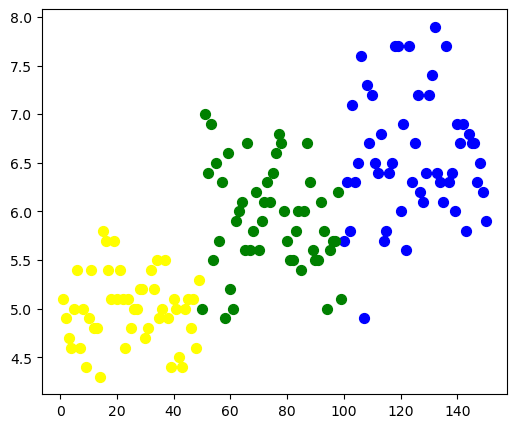

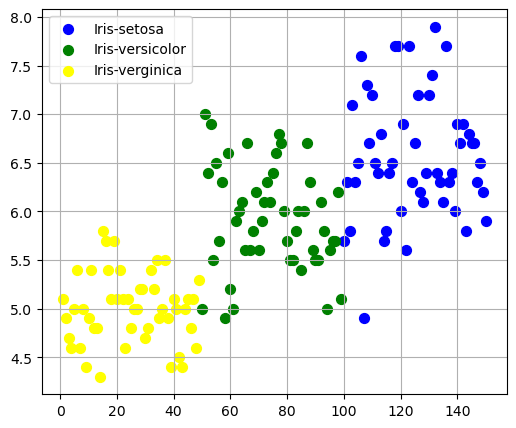

In [41]:
plt.figure(figsize = (6,5))
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], s= 50,c='blue',label= 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1], s= 50,c='green',label= 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1], s= 50,c='yellow',label= 'Iris-verginica')
# Centroid plotting of the clusters
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.clusters_centers_[:,1],s=100,c='red',label='Centroids')
plt.legend()
plt.grid()
plt.show()

# 